# Neural Networks: List 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## Dataset

### Loading

In [2]:
a=np.array([[-1,-1,-1,-1,1],[1,-1,1,1,-1],[1,-1,1,1,-1],[1,-1,1,1,-1],[1,-1,-1,-1,1]])
b=np.array([[-1,-1,-1,-1,-1],[1,1,1,-1,1],[1,1,1,-1,1],[-1,1,1,-1,1],[-1,-1,-1,1,1]])
c=np.array([[1,-1,-1,-1,-1],[-1,1,1,1,1],[-1,1,1,1,1],[-1,1,1,1,1],[1,-1,-1,-1,-1]])
d=np.array([[-1,1,1,1,-1],[-1,-1,1,-1,-1],[-1,1,-1,1,-1],[-1,1,1,1,-1],[-1,1,1,1,-1]])
p5=np.array([[1,-1,1,-1,1],[-1,1,-1,1,-1],[1,-1,1,-1,1],[-1,1,-1,1,-1],[1,-1,1,-1,1]])
p6=np.array([[1,-1,-1,-1,1],[-1,1,1,1,1],[1,-1,-1,-1,1],[1,1,1,1,-1],[1,-1,-1,-1,1]])
train_data = np.array([a, b, c, d, p5, p6])
t1=np.array([[-1,-1,-1,-1,1],[1,-1,1,1,-1],[1,-1,1,1,-1],[-1,-1,1,1,-1],[1,-1,-1,-1,1]])
t2=np.array([[-1,-1,-1,-1,1],[1,1,1,-1,1],[1,1,1,-1,1],[-1,1,1,-1,1],[-1,1,-1,1,1]])
t3=np.array([[-1,-1,-1,-1,1],[1,1,1,-1,1],[1,-1,1,-1,1],[1,1,1,1,1],[-1,-1,-1,1,1]])
t4=np.array([[-1,-1,-1,-1,-1],[-1,1,1,1,-1],[-1,1,-1,1,1],[-1,1,1,-1,1],[1,-1,-1,-1,-1]])
t5=np.array([[-1,1,1,1,-1],[-1,-1,1,-1,-1],[-1,1,-1,1,-1],[-1,1,1,1,-1],[-1,1,1,1,-1]])
t6=np.array([[1,-1,1,1,-1],[1,-1,1,-1,-1],[-1,1,-1,1,1],[-1,1,1,1,-1],[-1,1,1,1,-1]])
t7=np.array([[-1,-1,-1,1,-1],[1,-1,1,1,-1],[1,-1,1,-1,-1],[-1,-1,1,1,-1],[1,1,1,-1,1]])
t8=np.array([[-1,1,1,1,-1],[-1,-1,1,1,-1],[1,1,-1,-1,1],[-1,1,1,1,-1],[-1,1,1,1,1]])
t9=np.array([[-1,-1,-1,-1,1],[1,1,1,1,1],[-1,1,1,1,1],[-1,1,-1,-1,1],[-1,-1,1,1,1]])
t10=np.array([[-1,-1,1,1,-1],[-1,1,1,1,1],[1,1,1,-1,1],[1,1,1,1,1],[1,1,-1,-1,1]])
t11=np.array([[-1,-1,1,1,1],[1,1,1,-1,-1],[-1,1,-1,1,-1],[-1,1,-1,-1,1],[-1,1,1,1,-1]])
t12=np.array([[1,-1,1,-1,1],[-1,1,1,1,-1],[1,-1,1,1,1],[-1,-1,-1,1,1],[1,-1,-1,1,-1]])
t13=np.array([[1,1,1,1,-1],[1,-1,1,-1,1],[1,1,1,1,-1],[-1,-1,1,1,-1],[-1,1,1,-1,1]])
test = np.array([t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12, t13])
full = np.array([a, b, c, d, p5, p6,t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12, t13])

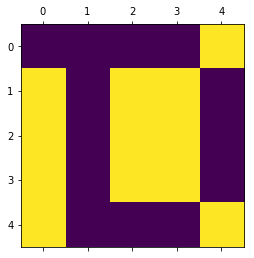

In [3]:
plt.matshow(train_data[0])

# Problem 4

Implement the continuous Hopfield network.

**Riddle to solve:** Unless, I am mistaken, the derivative of the loss function should be defined as:
$$\frac{\partial G}{\partial w_{km}}=-\frac{1}{2}\sum_{\mu=1}^N(\xi^\mu_k-S^\mu_k)\xi^\mu_m$$
where $S^\mu_k=\tanh(\frac{1}{2}\sum_{j=1}^{N_b}w_{kj}\xi^\mu_j)$.

But here, in the implementation, the problem is solved by the following weight change function:
$$\frac{\partial G}{\partial w_{km}}=-\frac{1}{2}\sum_{\mu=1}^N(\xi^\mu_k+S^\mu_k)\xi^\mu_m.$$
And I have no clue why it is so. Either, I have made a mistake in the derivations or there is some mistake in the code changing the signs somewhere.

In [4]:
import hopfield

In [5]:
class ContinuousHopifield(hopfield.Hopfield):
  def __init__(self, number_of_bits, print_format, synchronous_update=True):
    super().__init__(number_of_bits, print_format=print_format, synchronous=synchronous_update,
                     activation_function=lambda x: np.tanh(0.5 * x),
               symmetric_weights=True, zero_self_interaction=True)
    self.weights = np.random.random((number_of_bits, number_of_bits))
    
  def predict(self, state=None):
    pattern = state
    if pattern is None:
      pattern = self.memory_state
    if self.synchronous:
      self.memory_state = self.activation_function(self.weights @ pattern)
    else:
      new_state = np.copy(pattern)
      ids = np.arange(self.number_of_bits)
      np.random.shuffle(ids)
      for i in ids:
        temp = np.copy(new_state)
        new_state[i] = self.activation_function(self.weights[i, :] @ new_state)
      self.memory_state = new_state
    return self.memory_state
  
  def loss(self, dataset):
    train_set = dataset.reshape(dataset.shape[0], -1)
    response = np.apply_along_axis(self.predict, 1, train_set)
    return -0.5*((train_set+1-1e-31)*np.log(0.5*(response+1 +1e-31))
                 + (-train_set+1-1e-31)*np.log(0.5*(-response+1 +1e-31))).sum()
  
  def train(self, dataset, epochs=None, learning_rate=0.1, tolerance=None, verbose=False):
    train_set = np.copy(dataset.reshape(dataset.shape[0], -1))
    
    if not tolerance is None and epochs is None:
      prev_loss = self.loss(train_set) + 2 * tolerance
      # Trains as long as loss goes down by some given parameter
      counter = 1
      while self.loss(train_set) > tolerance:
        weight_change = np.apply_along_axis(self.predict, 1, train_set)
        weight_change = train_set + weight_change
        weight_change = -.5*train_set.T @ weight_change
        prev_loss = self.loss(train_set)
        if verbose:
          print(f'Epoch: {counter} Loss: {prev_loss}')
          counter += 1
        self.weights += -learning_rate * weight_change
        
    elif tolerance is None and not epochs is None:
      # Trains for a given number of epochs
      for i in range(epochs):
        weight_change = np.apply_along_axis(self.predict, 1, train_set)
        weight_change = (train_set + weight_change)
        weight_change = -0.5*train_set.T @ weight_change
        self.weights += -learning_rate * weight_change
        if verbose:
          print(f'Epoch: {i} Loss: {self.loss(train_set)}')
    else:
      raise Exception('Choose either precision or epoch training!')

## Training for 4 patterns

In [6]:
cont_hop4 = ContinuousHopifield(25, print_format=(5,5), synchronous_update=False)

In [7]:
cont_hop4.train(np.copy(train_data[:4]), epochs=100, verbose=True)

Epoch: 0 Loss: 69.31471805599453
Epoch: 1 Loss: 69.31471805599453
Epoch: 2 Loss: 69.31471805599453
Epoch: 3 Loss: 69.31471805599453
Epoch: 4 Loss: 69.31471805599453
Epoch: 5 Loss: 69.31471805599453
Epoch: 6 Loss: 69.31471805599453
Epoch: 7 Loss: 69.31471805599453
Epoch: 8 Loss: 69.31471805599453
Epoch: 9 Loss: 69.31471805599453
Epoch: 10 Loss: 69.31471805599453
Epoch: 11 Loss: 69.31471805599453
Epoch: 12 Loss: 69.31471805599453
Epoch: 13 Loss: 69.31471805599453
Epoch: 14 Loss: 69.31471805599453
Epoch: 15 Loss: 69.31471805599453
Epoch: 16 Loss: 69.31471805599453
Epoch: 17 Loss: 69.31471805599453
Epoch: 18 Loss: 69.31471805599453
Epoch: 19 Loss: 67.92842369487465
Epoch: 20 Loss: 65.84898215319481
Epoch: 21 Loss: 61.690099069835135
Epoch: 22 Loss: 58.91751034759535
Epoch: 23 Loss: 57.53121598647546
Epoch: 24 Loss: 45.054566736396445
Epoch: 25 Loss: 38.81624211135694
Epoch: 26 Loss: 33.964211847437326
Epoch: 27 Loss: 25.64644568071797
Epoch: 28 Loss: 24.953298500158027
Epoch: 29 Loss: 26.3

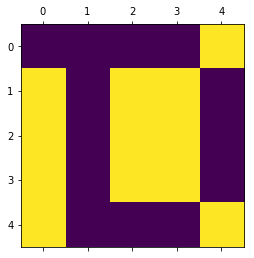

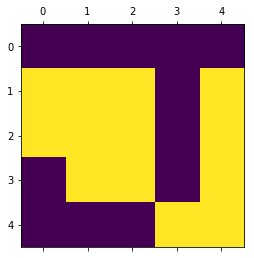

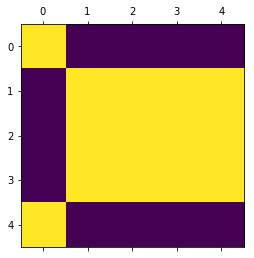

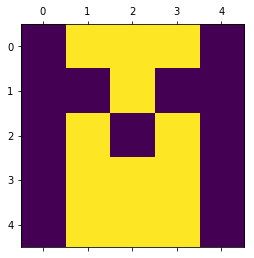

In [8]:
for i in range(4):
  plt.matshow(np.sign(cont_hop4.predict(train_data[i].flatten())).reshape(5,5))

## Training for 5 patterns

In [10]:
cont_hop5 = ContinuousHopifield(25, print_format=(5,5), synchronous_update=False)

In [11]:
cont_hop5.train(train_data[:5], epochs=100)

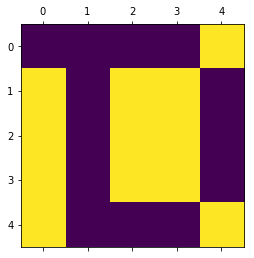

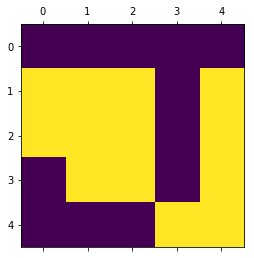

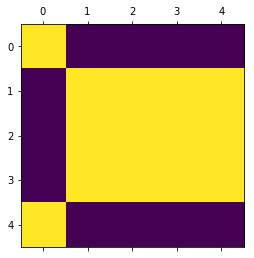

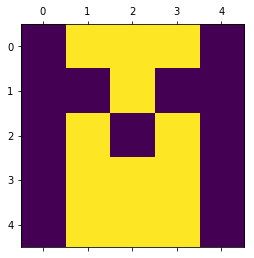

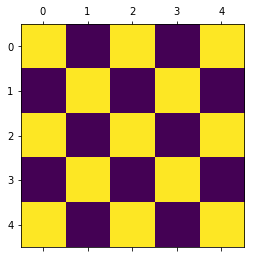

In [12]:
for i in range(5):
  plt.matshow(np.sign(cont_hop5.predict(train_data[i].flatten())).reshape(5,5))

## Training for 6 patterns

In [13]:
cont_hop6 = ContinuousHopifield(25, print_format=(5,5), synchronous_update=False)

In [14]:
cont_hop6.train(train_data[:6], epochs=100)

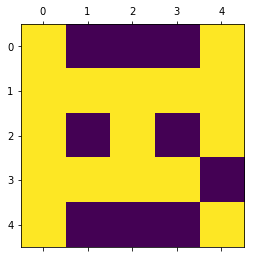

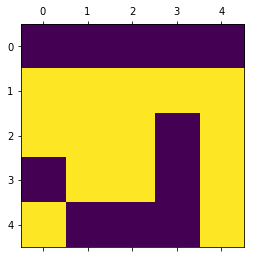

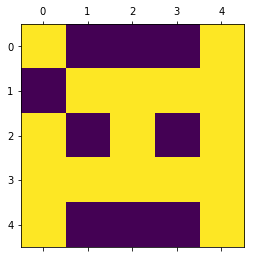

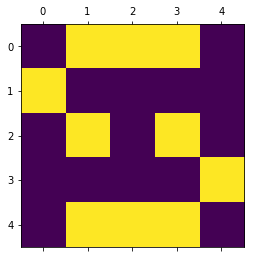

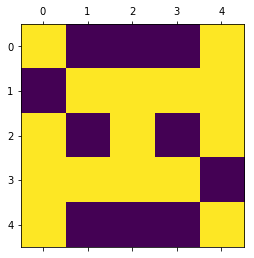

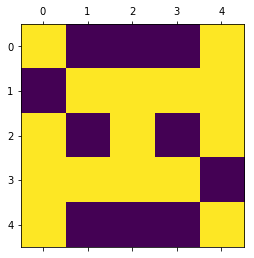

In [17]:
for i in range(6):
  plt.matshow(hopfield.signum(cont_hop6.predict(train_data[i].flatten())).reshape(5,5))

As it can be seen above, the capacity of the continuous Hopfield network did not increase for the given training set. Alternative hypothesis can be made that the pattern *p6* can not be handled by the network. 

## Testing

We choose the network trained with 4 patterns to see how does the convergence work here.

Pattern no. 0


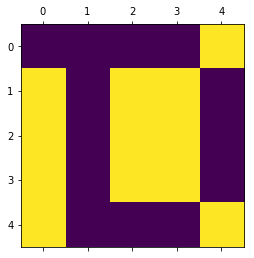

Pattern no. 1


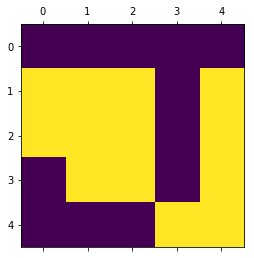

Pattern no. 2


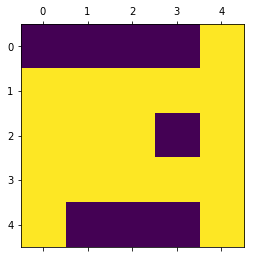

Pattern no. 3


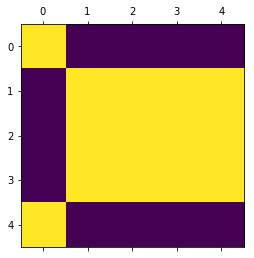

Pattern no. 4


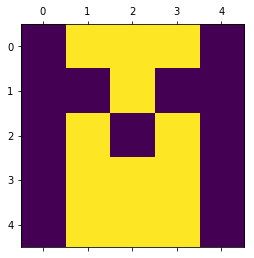

Pattern no. 5


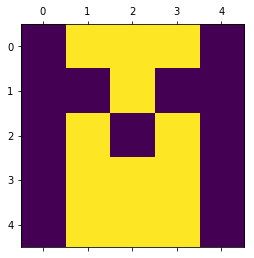

Pattern no. 6


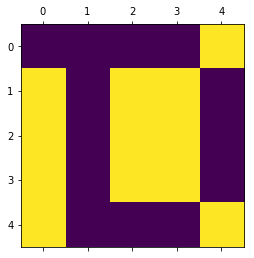

Pattern no. 7


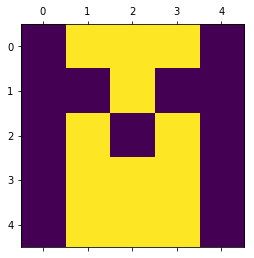

Pattern no. 8


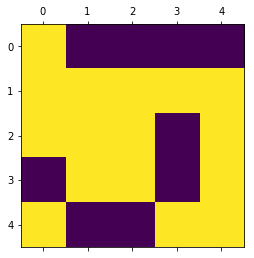

Pattern no. 9


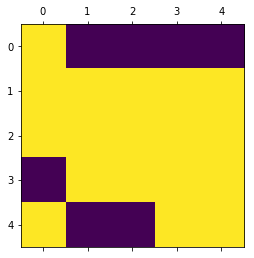

Pattern no. 10


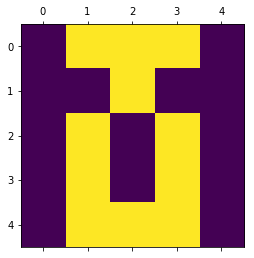

Pattern no. 11


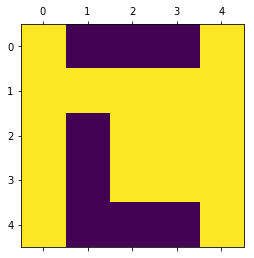

Pattern no. 12


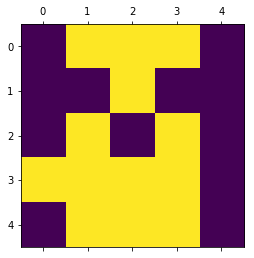

In [22]:
for i in range(len(test)):
  print(f'Pattern no. {i}')
  plt.matshow(hopfield.signum(cont_hop4.predict(test[i].flatten())).reshape(5,5))
  plt.show()

Patterns except *2, 8, 9, 10, 11, 12* converge in a single step. Others, interestingly depend on the update - it is done asynchronously with a random order. And can have either 1, 2 or no attractors, e.g. pattern no. 10.

Pattern no. 2


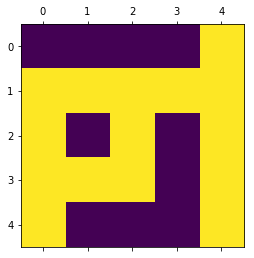

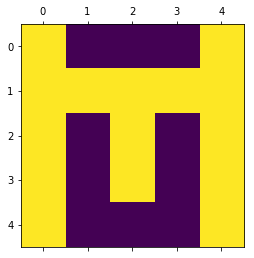

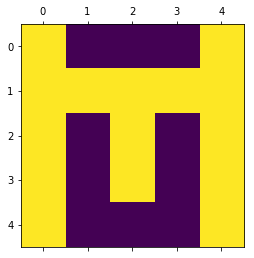

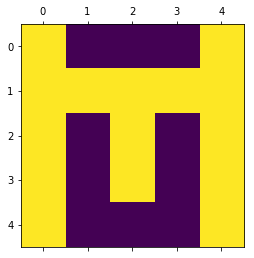

******************************
Pattern no. 8


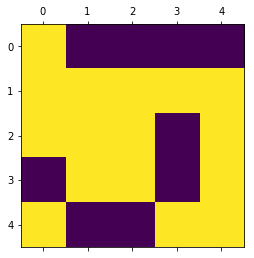

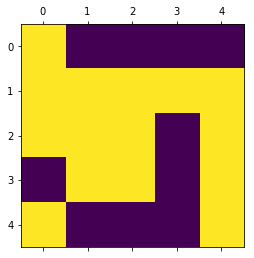

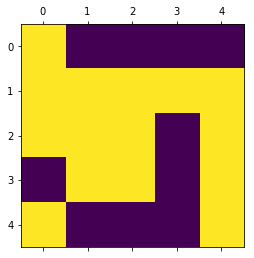

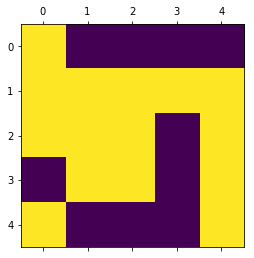

******************************
Pattern no. 9


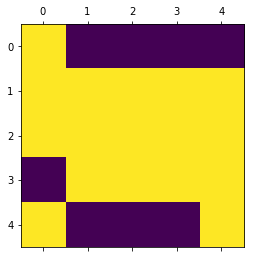

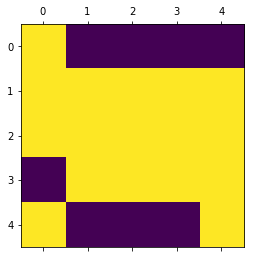

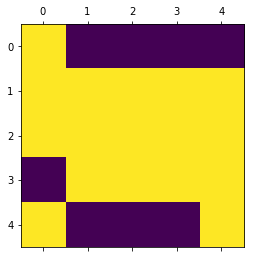

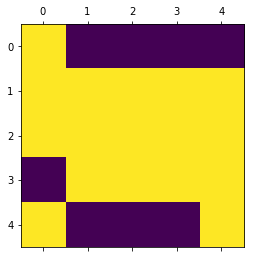

******************************
Pattern no. 10


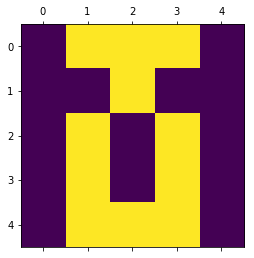

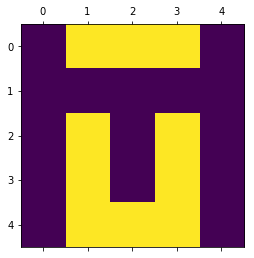

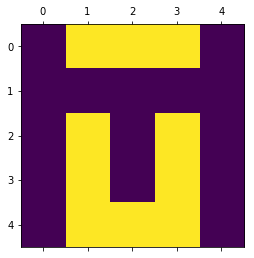

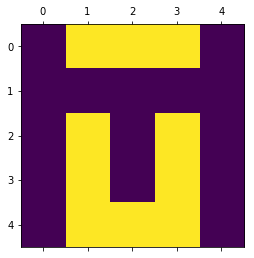

******************************
Pattern no. 11


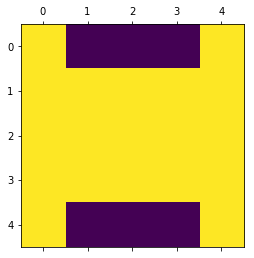

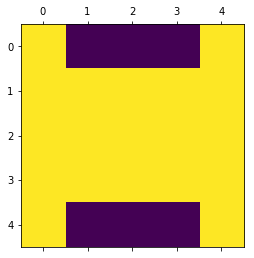

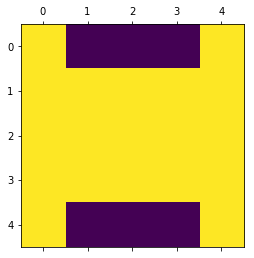

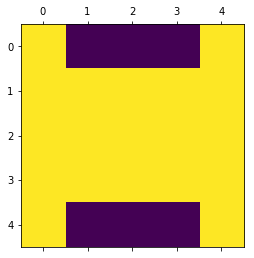

******************************
Pattern no. 12


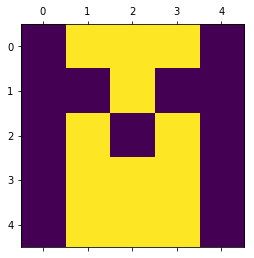

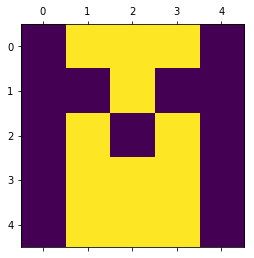

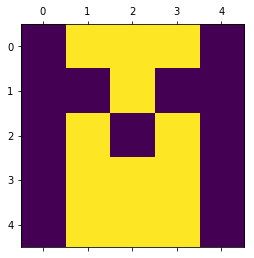

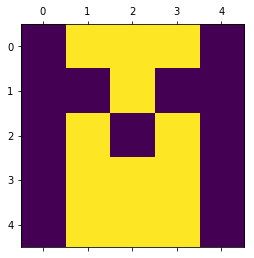

******************************


In [31]:
for i in [2, 8, 9, 10, 11, 12]:
  print(f'Pattern no. {i}')
  plt.matshow(hopfield.signum(cont_hop4.predict(test[i].flatten())).reshape(5,5))
  plt.show()
  for j in range(3):
    plt.matshow(hopfield.signum(cont_hop4.predict()).reshape(5,5))
    plt.show()
  print('*'*30)